# Spline fit tests

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline, make_splrep, make_smoothing_spline

from apogee_sample import APOGEESample
import paths

plt.style.use(paths.styles / 'paper.mplstyle')

In [2]:
full_sample = APOGEESample.load()
local_sample = full_sample.region(galr_lim=(7, 9), absz_lim=(0, 0.5))

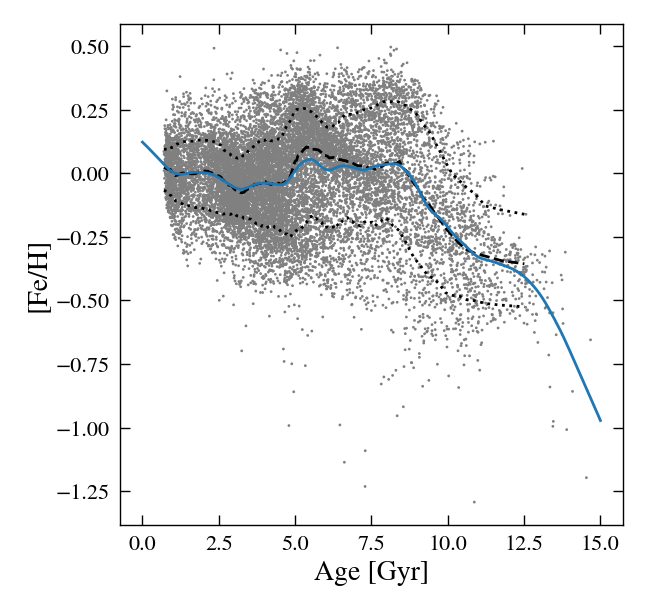

In [97]:
fig, ax = plt.subplots(dpi=200)
ax.scatter(
    local_sample('L23_AGE'), local_sample('FE_H'),
    rasterized=True, c='gray', s=1, edgecolors='none'
)
# B-spline fit
xarr = np.arange(0., 15.1, 0.1)
# sort data by increasing age, drop nans
rolling_params = dict(window=1000, min_periods=100, step=100, on='L23_AGE', center=True)
sorted_ages = local_sample.data.dropna(subset='L23_AGE').sort_values('L23_AGE')[['L23_AGE', 'FE_H', 'FE_H_ERR']]
rolling_medians = sorted_ages.rolling(**rolling_params).quantile(0.5)
ax.plot(rolling_medians['L23_AGE'], rolling_medians['FE_H'], 'k--')
rolling_sigma_low = sorted_ages.rolling(**rolling_params).quantile(0.16)
ax.plot(rolling_sigma_low['L23_AGE'], rolling_sigma_low['FE_H'], 'k:')
rolling_sigma_high = sorted_ages.rolling(**rolling_params).quantile(0.84)
ax.plot(rolling_sigma_high['L23_AGE'], rolling_sigma_high['FE_H'], 'k:')
# fit B-spline to sorted data
spl2 = make_smoothing_spline(sorted_ages['L23_AGE'], sorted_ages['FE_H'], lam=1)
ax.plot(xarr, spl2(xarr))
ax.set_xlabel('Age [Gyr]')
ax.set_ylabel('[Fe/H]')
plt.show()

In [98]:
rolling_sigma_low['L23_AGE'].iloc[-1]

np.float64(12.51003178)

In [99]:
rolling_sigma_high['L23_AGE'].iloc[-1]

np.float64(12.51003178)